# MLP

### スクラッチ実装

In [ ]:
# ライブラリ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn import datasets
import torch.nn.functional as F

from sklearn.model_selection import train_test_split

In [57]:
# 1. データ読み込み
dataset = datasets.load_digits()

images = dataset['images']
target = dataset['target']

In [58]:
# 確認
print(images.shape)
print(target.shape)

(1797, 8, 8)
(1797,)


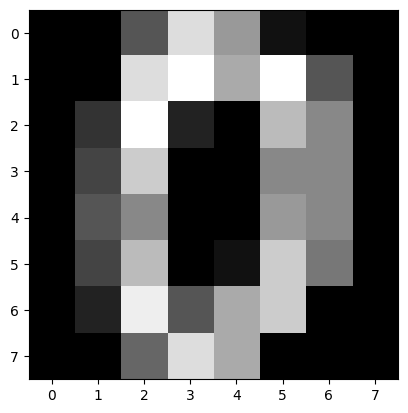

In [59]:
# image確認
plt.imshow(images[0], cmap='gray')

In [60]:
# データを分割する
X_train, X_test, y_train, y_test = train_test_split(images, target, test_size=0.2, random_state=42)

In [61]:
# shape確認
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1437, 8, 8) (1437,)
(360, 8, 8) (360,)


In [62]:
# 標準化
X_mean = X_train.mean()
X_std = X_train.std()

X_train  = (X_train - X_mean) / X_std
X_test = (X_train - X_mean) / X_std

# one-hotエンコーディング

y_train = F.one_hot(torch.tensor(y_train), num_classes = 10)
y_test = F.one_hot(torch.tensor(y_test), num_classes = 10)

# 1次元で扱いたいため8x8 -> 64にしたい
X_train = torch.tensor(X_train, dtype=torch.float32).reshape(-1, 64)
X_test = torch.tensor(X_test, dtype=torch.float32).reshape(-1, 64)

## スクラッチでMLPを実装

1層目  
Z[1] = XW[1].T + B[1]  

n = 64  
X : m x n(データ数 x 特徴量)  
W : nh x n(隠れそうのニューロン数(出力数) x 入力)  
B : 1 x nh(broad casting)  

2層目  
Z[2] = AW[2].T + B[2]  
W ; 出力 x nh(10 x nh(入力30))  
B : 1 x 10  

In [69]:
# 3. パラメータの初期化


# 隠れそうのニューロン数
nh = 30
# データ数(入力数)
# n = 64
# mはデータ数, nは特徴量数
m, n = X_train.shape

class_num = 10

W1 = torch.randn((nh, n),requires_grad=True) # 出力 x 入力
# バイアスは初期値は0にすることが多い。
b1 = torch.zeros((1, nh),requires_grad=True) # 1 x nh(隠れそうのニューロン)

# 2層目

W2 = torch.randn((class_num, nh), requires_grad=True)  
b2 = torch.zeros((1, class_num), requires_grad=True)

In [70]:
# 4. 線形変換の関数
def linear(X, W, b):
    return X@W.T + b

# ReLUの実装
def relu(Z):
    # .clapm_minの中より小さいのは()で置き換える
    return Z.clamp_min(0.)

def softmax(x):
    e_x = torch.exp(x - torch.max(x, dim=-1, keepdim=True)[0])
    return e_x / (torch.sum(e_x, dim=-1, keepdim=True) + 1e-10)


In [75]:
# model
def model(X):
    Z1 = linear(X, W1, b1)
    A1 = relu(Z1)
    # import pdb; pdb.set_trace()
    Z2 = linear(A1, W2, b2)
    
    # 出力層(softmax)
    A2 = softmax(Z2)
    return A2
    

In [79]:
# modelを実際に読み込み
y_train_pred = model(X_train)

In [43]:
# 実験
z1 = linear(X_train, w1, b1)
z1.shape

torch.Size([1437, 30])

In [45]:
# reluの実験
a = torch.tensor([-1., 0., 2. -5.,3.])
a

tensor([-1.,  0., -3.,  3.])

In [46]:
# 新しいtensorに置き換える
a.clamp_min(0.)

tensor([0., 0., 0., 3.])

In [47]:
a

tensor([-1.,  0., -3.,  3.])